In [31]:
import numpy as np 
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
from sklearn import linear_model


In [32]:
from subprocess import check_output

In [33]:
data = pd.read_csv(r'C:\Users\asus\Desktop/rainfall in india.csv')

In [34]:
data.head(1000)

,SUBDIVISION,YEAR,JAN,FEB,MAR,APR,MAY,JUN,JUL,AUG,SEP,OCT,NOV,DEC,ANNUAL,Jan-Feb,Mar-May,Jun-Sep,Oct-Dec
0,ANDAMAN & NICOBAR ISLANDS,1901,49.2,87.1,29.2,2.3,528.8,517.5,365.1,481.1,332.6,388.5,558.2,33.6,3373.2,136.3,560.3,1696.3,980.3
1,ANDAMAN & NICOBAR ISLANDS,1902,0.0,159.8,12.2,0.0,446.1,537.1,228.9,753.7,666.2,197.2,359.0,160.5,3520.7,159.8,458.3,2185.9,716.7
2,ANDAMAN & NICOBAR ISLANDS,1903,12.7,144.0,0.0,1.0,235.1,479.9,728.4,326.7,339.0,181.2,284.4,225.0,2957.4,156.7,236.1,1874.0,690.6
3,ANDAMAN & NICOBAR ISLANDS,1904,9.4,14.7,0.0,202.4,304.5,495.1,502.0,160.1,820.4,222.2,308.7,40.1,3079.6,24.1,506.9,1977.6,571.0
4,ANDAMAN & NICOBAR ISLANDS,1905,1.3,0.0,3.3,26.9,279.5,628.7,368.7,330.5,297.0,260.7,25.4,344.7,2566.7,1.3,309.7,1624.9,630.8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,BIHAR,1999,0.1,0.2,0.4,3.8,83.6,265.1,380.8,347.5,199.6,114.1,6.9,0.6,1402.7,0.3,87.8,1192.9,121.7
996,BIHAR,2000,0.5,12.1,3.6,37.2,96.2,267.2,264.3,201.4,314.8,9.6,0.0,0.1,1207.0,12.7,137.0,1047.7,9.7
997,BIHAR,2001,1.0,0.5,3.0,12.6,98.4,224.4,224.7,225.9,274.8,181.3,0.5,0.0,1247.0,1.5,114.0,949.8,181.8
998,BIHAR,2002,13.4,11.3,2.2,25.0,74.8,116.6,386.1,247.7,192.8,33.8,1.4,0.7,1105.8,24.6,102.1,943.2,35.8


In [35]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4116 entries, 0 to 4115
Data columns (total 19 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   SUBDIVISION  4116 non-null   object 
 1   YEAR         4116 non-null   int64  
 2   JAN          4112 non-null   float64
 3   FEB          4113 non-null   float64
 4   MAR          4110 non-null   float64
 5   APR          4112 non-null   float64
 6   MAY          4113 non-null   float64
 7   JUN          4111 non-null   float64
 8   JUL          4109 non-null   float64
 9   AUG          4112 non-null   float64
 10  SEP          4110 non-null   float64
 11  OCT          4109 non-null   float64
 12  NOV          4105 non-null   float64
 13  DEC          4106 non-null   float64
 14  ANNUAL       4090 non-null   float64
 15  Jan-Feb      4110 non-null   float64
 16  Mar-May      4107 non-null   float64
 17  Jun-Sep      4106 non-null   float64
 18  Oct-Dec      4103 non-null   float64
dtypes: flo

In [36]:
data.dropna(how='any', inplace=True)

In [37]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4090 entries, 0 to 4115
Data columns (total 19 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   SUBDIVISION  4090 non-null   object 
 1   YEAR         4090 non-null   int64  
 2   JAN          4090 non-null   float64
 3   FEB          4090 non-null   float64
 4   MAR          4090 non-null   float64
 5   APR          4090 non-null   float64
 6   MAY          4090 non-null   float64
 7   JUN          4090 non-null   float64
 8   JUL          4090 non-null   float64
 9   AUG          4090 non-null   float64
 10  SEP          4090 non-null   float64
 11  OCT          4090 non-null   float64
 12  NOV          4090 non-null   float64
 13  DEC          4090 non-null   float64
 14  ANNUAL       4090 non-null   float64
 15  Jan-Feb      4090 non-null   float64
 16  Mar-May      4090 non-null   float64
 17  Jun-Sep      4090 non-null   float64
 18  Oct-Dec      4090 non-null   float64
dtypes: flo

In [38]:
subdivs = data['SUBDIVISION'].unique()
num_of_subdivs = subdivs.size
print('Total # of Subdivs: ' + str(num_of_subdivs))
subdivs

Total # of Subdivs: 36


array(['ANDAMAN & NICOBAR ISLANDS', 'ARUNACHAL PRADESH',
       'ASSAM & MEGHALAYA', 'NAGA MANI MIZO TRIPURA',
       'SUB HIMALAYAN WEST BENGAL & SIKKIM', 'GANGETIC WEST BENGAL',
       'ORISSA', 'JHARKHAND', 'BIHAR', 'EAST UTTAR PRADESH',
       'WEST UTTAR PRADESH', 'UTTARAKHAND', 'HARYANA DELHI & CHANDIGARH',
       'PUNJAB', 'HIMACHAL PRADESH', 'JAMMU & KASHMIR', 'WEST RAJASTHAN',
       'EAST RAJASTHAN', 'WEST MADHYA PRADESH', 'EAST MADHYA PRADESH',
       'GUJARAT REGION', 'SAURASHTRA & KUTCH', 'KONKAN & GOA',
       'MADHYA MAHARASHTRA', 'MATATHWADA', 'VIDARBHA', 'CHHATTISGARH',
       'COASTAL ANDHRA PRADESH', 'TELANGANA', 'RAYALSEEMA', 'TAMIL NADU',
       'COASTAL KARNATAKA', 'NORTH INTERIOR KARNATAKA',
       'SOUTH INTERIOR KARNATAKA', 'KERALA', 'LAKSHADWEEP'], dtype=object)

In [39]:
data.describe()

,YEAR,JAN,FEB,MAR,APR,MAY,JUN,JUL,AUG,SEP,OCT,NOV,DEC,ANNUAL,Jan-Feb,Mar-May,Jun-Sep,Oct-Dec
count,4090.000000,4090.000000,4090.000000,4090.000000,4090.000000,4090.000000,4090.000000,4090.000000,4090.000000,4090.000000,4090.000000,4090.000000,4090.000000,4090.000000,4090.000000,4090.000000,4090.000000,4090.000000
mean,1958.321271,18.818484,21.644792,27.252494,42.714548,84.868044,228.928020,346.496968,289.897506,197.003056,95.139022,39.548191,18.695575,1411.008900,40.462861,154.835452,1062.325575,153.384499
std,33.148944,33.521719,35.762010,46.829179,67.264863,122.556801,233.535693,269.352685,187.702293,135.266708,99.325638,68.275513,42.185553,903.846565,59.136229,200.315769,705.970202,166.414108
min,1901.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.400000,0.000000,0.000000,0.100000,0.000000,0.000000,0.000000,62.300000,0.000000,0.000000,57.400000,0.000000
25%,1930.000000,0.600000,0.600000,1.000000,3.000000,8.500000,70.000000,175.225000,155.925000,100.400000,14.600000,0.700000,0.100000,804.500000,4.100000,23.800000,573.275000,34.025000
50%,1959.000000,5.900000,6.600000,7.800000,15.500000,36.050000,138.450000,284.300000,259.500000,173.600000,64.650000,9.500000,3.000000,1121.300000,19.000000,74.250000,880.200000,97.550000
75%,1987.000000,21.950000,26.600000,31.100000,49.375000,94.975000,302.250000,416.700000,377.775000,265.600000,148.100000,45.475000,17.300000,1644.775000,50.200000,195.300000,1286.175000,211.800000
max,2015.000000,583.700000,403.500000,605.600000,595.100000,1168.600000,1609.900000,2362.800000,1664.600000,1222.000000,948.300000,648.900000,617.500000,6331.100000,699.500000,1745.800000,4536.900000,1252.500000


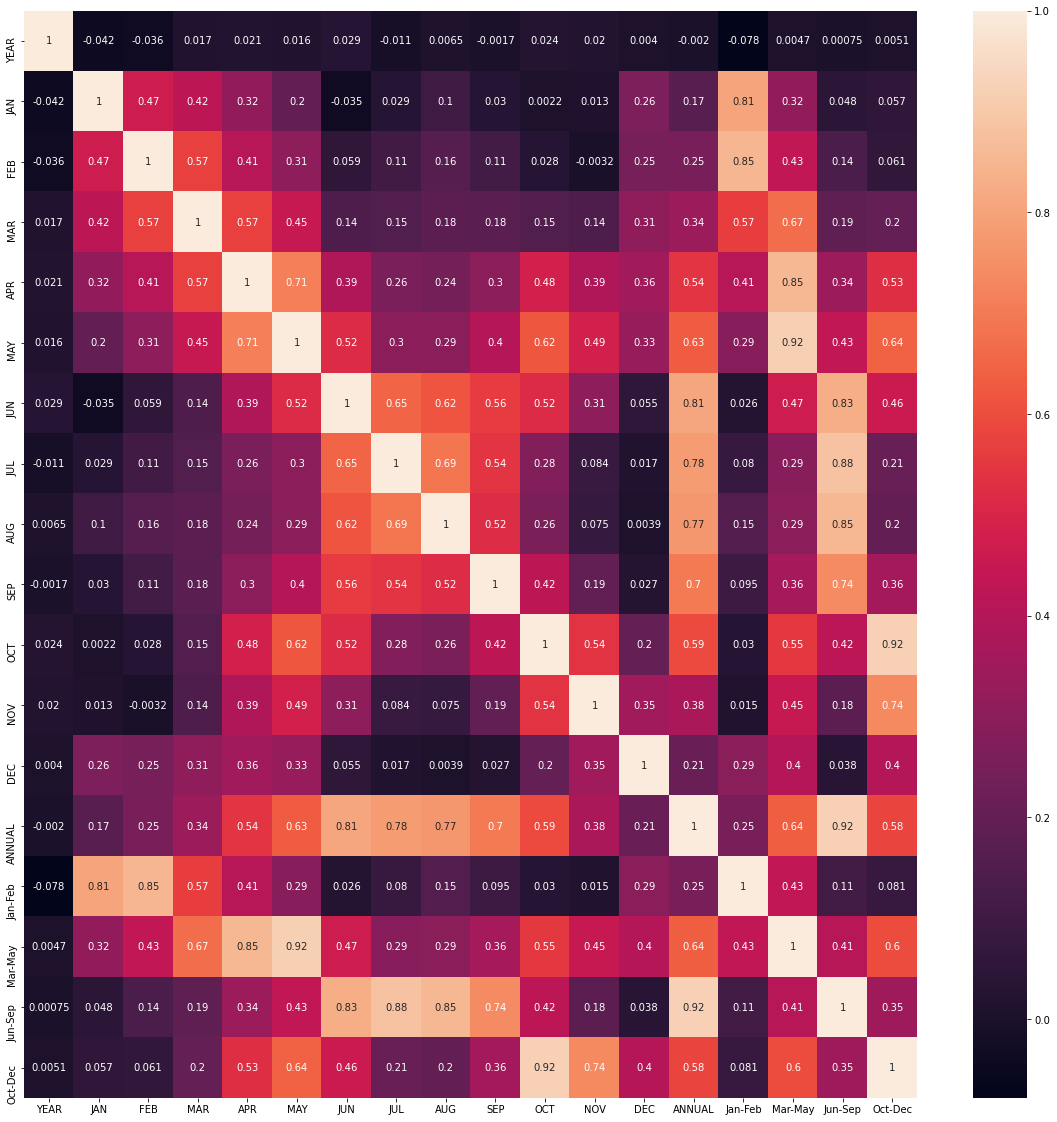

In [40]:
import seaborn as sns
corrmat = data.corr(method = "spearman")
plt.figure(figsize=(20,20))
#plot heat map
g=sns.heatmap(corrmat,annot=True)

SUBDIVISION
ARUNACHAL PRADESH    3418.857143
COASTAL KARNATAKA    3408.409649
KONKAN & GOA         2977.686087
Name: ANNUAL, dtype: float64
SUBDIVISION
HARYANA DELHI & CHANDIGARH    530.496522
SAURASHTRA & KUTCH            495.161739
WEST RAJASTHAN                292.673043
Name: ANNUAL, dtype: float64


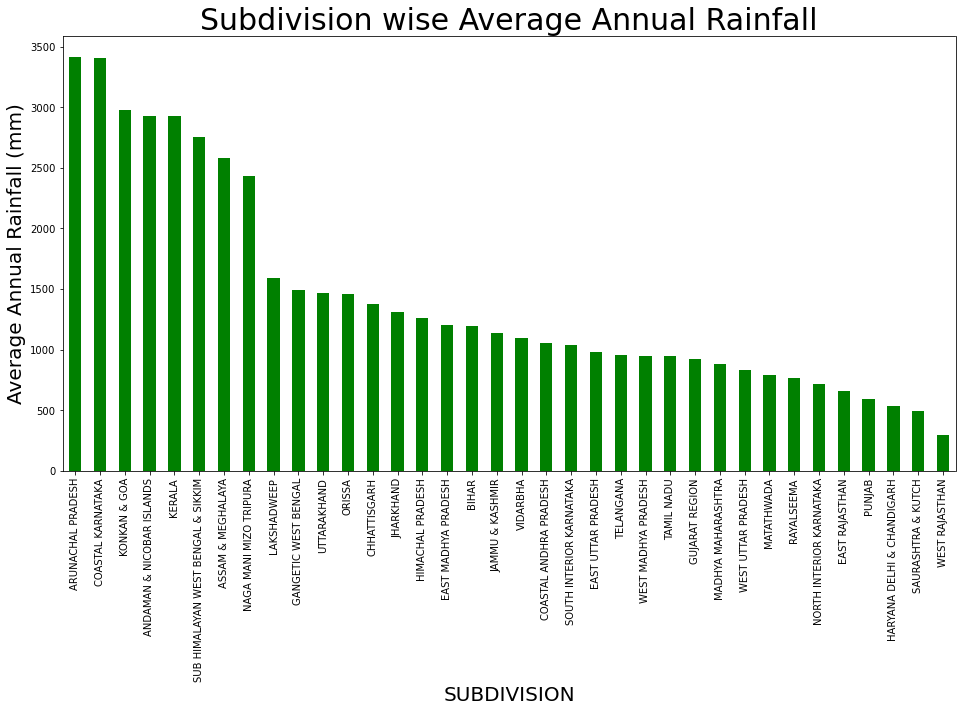

In [41]:
fig = plt.figure(figsize=(16,8))
ax = fig.add_subplot(111)
data.groupby('SUBDIVISION').mean().sort_values(by='ANNUAL', ascending=False)['ANNUAL'].plot(kind='bar', color='g',width=0.5,title='Subdivision wise Average Annual Rainfall', fontsize=10)
plt.xticks(rotation = 90)
plt.ylabel('Average Annual Rainfall (mm)')
ax.title.set_fontsize(30)
ax.xaxis.label.set_fontsize(20)
ax.yaxis.label.set_fontsize(20)
print(data.groupby('SUBDIVISION').mean().sort_values(by='ANNUAL', ascending=False)['ANNUAL'][[0,1,2]])
print(data.groupby('SUBDIVISION').mean().sort_values(by='ANNUAL', ascending=False)['ANNUAL'][[33,34,35]])

Max: 61815.600000000006 ocurred in [1961]
Max: 41273.6 ocurred in [1972]
Mean: 50182.83826086957


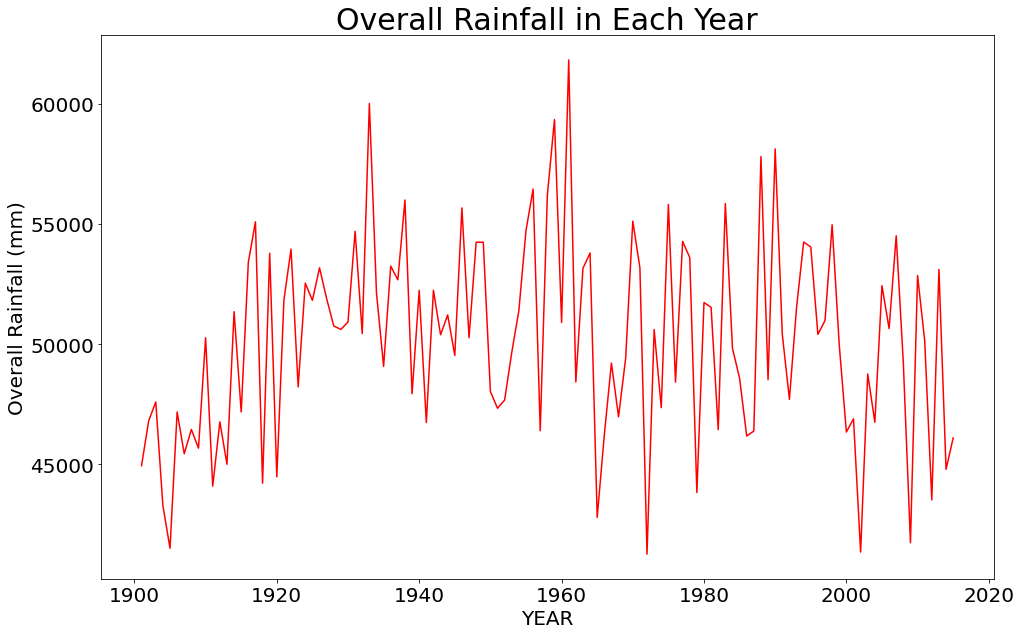

In [42]:
fig = plt.figure(figsize=(16,10))
ax = fig.add_subplot(111)
dfg = data.groupby('YEAR').sum()['ANNUAL']
dfg.plot(kind='line',color='r', title='Overall Rainfall in Each Year', fontsize=20)
#df.groupby('YEAR').sum()['ANNUAL'].plot()
#plt.xlim(0, 115)
#plt.xticks(np.linspace(0,115,24,endpoint=True),np.linspace(1900,2015,24,endpoint=True).astype(int))
#plt.xticks(np.linspace(1901,2015,24,endpoint=True))
#plt.xticks(rotation = 90)
plt.ylabel('Overall Rainfall (mm)')
ax.title.set_fontsize(30)
ax.xaxis.label.set_fontsize(20)
ax.yaxis.label.set_fontsize(20)
print('Max: ' + str(dfg.max()) + ' ocurred in ' + str(dfg.loc[dfg == dfg.max()].index.values[0:]))
print('Max: ' + str(dfg.min()) + ' ocurred in ' + str(dfg.loc[dfg == dfg.min()].index.values[0:]))
print('Mean: ' + str(dfg.mean()))

Max: 348.56750468137267 ocurred in ['JUL']
Max: 19.11137059083043 ocurred in ['JAN']
Mean: 118.95843815772808


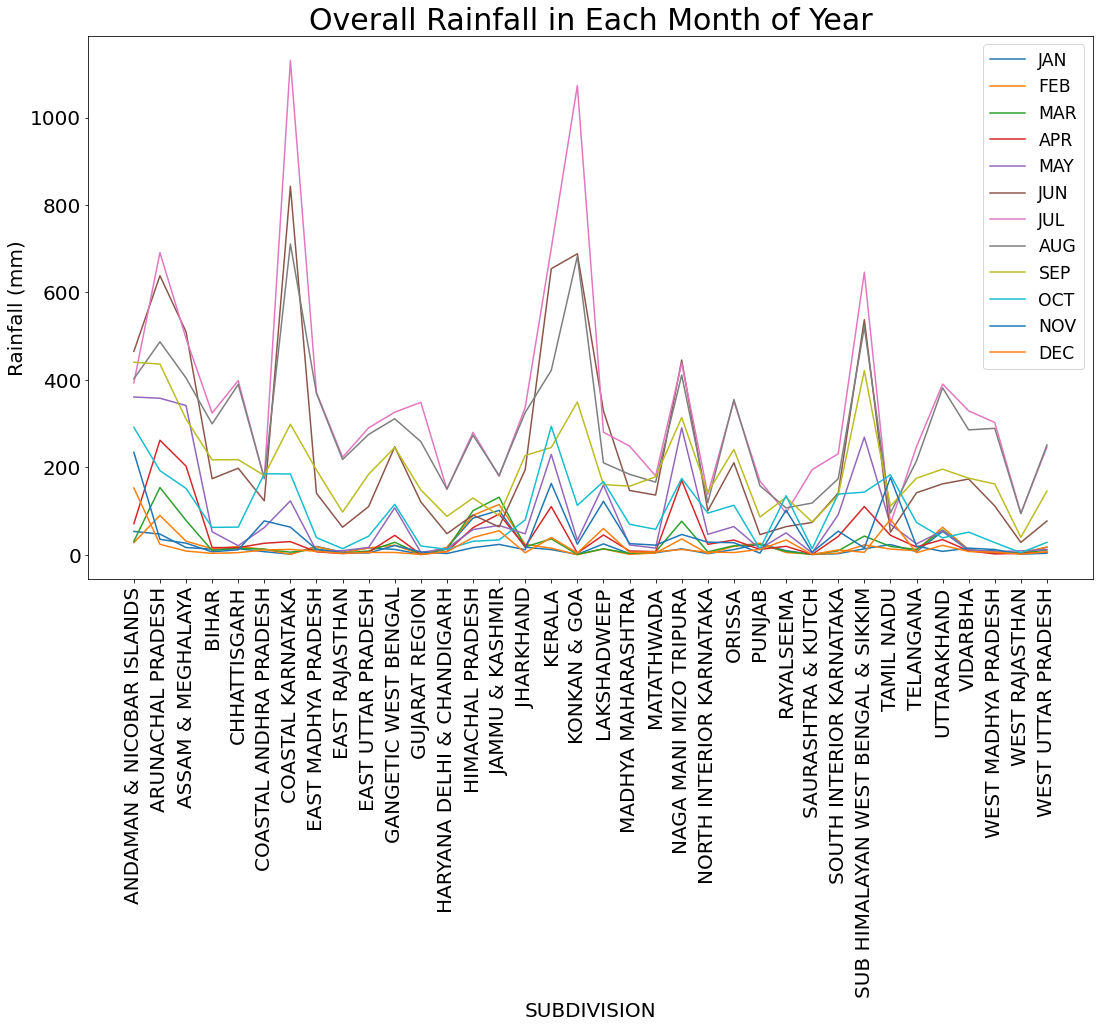

In [43]:
months = data.columns[2:14]
fig = plt.figure(figsize=(18,10))
ax = fig.add_subplot(111)
xlbls = data['SUBDIVISION'].unique()
xlbls.sort()
dfg = data.groupby('SUBDIVISION').mean()[months]
dfg.plot.line(title='Overall Rainfall in Each Month of Year', ax=ax,fontsize=20)
plt.xticks(np.linspace(0,35,36,endpoint=True),xlbls)
plt.xticks(  rotation = 90)
plt.ylabel('Rainfall (mm)')
plt.legend(loc='upper right', fontsize = 'xx-large')
ax.title.set_fontsize(30)
ax.xaxis.label.set_fontsize(20)
ax.yaxis.label.set_fontsize(20)

dfg = dfg.mean(axis=0)
print('Max: ' + str(dfg.max()) + ' ocurred in ' + str(dfg.loc[dfg == dfg.max()].index.values[0:]))
print('Max: ' + str(dfg.min()) + ' ocurred in ' + str(dfg.loc[dfg == dfg.min()].index.values[0:]))
print('Mean: ' + str(dfg.mean()))

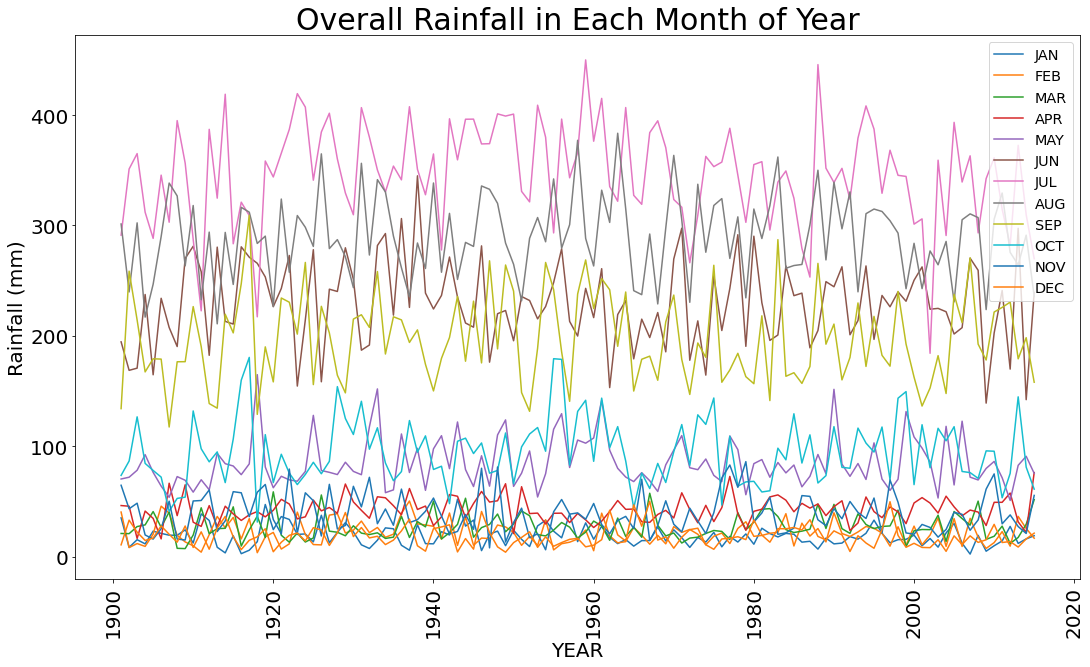

In [44]:
months = data.columns[2:14]
fig = plt.figure(figsize=(18,10))
ax = fig.add_subplot(111)
data.groupby('YEAR').mean()[months].plot.line(title='Overall Rainfall in Each Month of Year', ax=ax,fontsize=20)
#plt.xticks(np.linspace(0,35,36,endpoint=True),xlbls)
plt.xticks(  rotation = 90)
plt.ylabel('Rainfall (mm)')
plt.legend(loc='upper right', fontsize = 'x-large')
ax.title.set_fontsize(30)
ax.xaxis.label.set_fontsize(20)
ax.yaxis.label.set_fontsize(20)

In [45]:
from sklearn.model_selection import train_test_split
y = data['YEAR']
X = data.drop('YEAR', axis=1)

In [46]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8)

In [47]:
X


,SUBDIVISION,JAN,FEB,MAR,APR,MAY,JUN,JUL,AUG,SEP,OCT,NOV,DEC,ANNUAL,Jan-Feb,Mar-May,Jun-Sep,Oct-Dec
0,ANDAMAN & NICOBAR ISLANDS,49.2,87.1,29.2,2.3,528.8,517.5,365.1,481.1,332.6,388.5,558.2,33.6,3373.2,136.3,560.3,1696.3,980.3
1,ANDAMAN & NICOBAR ISLANDS,0.0,159.8,12.2,0.0,446.1,537.1,228.9,753.7,666.2,197.2,359.0,160.5,3520.7,159.8,458.3,2185.9,716.7
2,ANDAMAN & NICOBAR ISLANDS,12.7,144.0,0.0,1.0,235.1,479.9,728.4,326.7,339.0,181.2,284.4,225.0,2957.4,156.7,236.1,1874.0,690.6
3,ANDAMAN & NICOBAR ISLANDS,9.4,14.7,0.0,202.4,304.5,495.1,502.0,160.1,820.4,222.2,308.7,40.1,3079.6,24.1,506.9,1977.6,571.0
4,ANDAMAN & NICOBAR ISLANDS,1.3,0.0,3.3,26.9,279.5,628.7,368.7,330.5,297.0,260.7,25.4,344.7,2566.7,1.3,309.7,1624.9,630.8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4111,LAKSHADWEEP,5.1,2.8,3.1,85.9,107.2,153.6,350.2,254.0,255.2,117.4,184.3,14.9,1533.7,7.9,196.2,1013.0,316.6
4112,LAKSHADWEEP,19.2,0.1,1.6,76.8,21.2,327.0,231.5,381.2,179.8,145.9,12.4,8.8,1405.5,19.3,99.6,1119.5,167.1
4113,LAKSHADWEEP,26.2,34.4,37.5,5.3,88.3,426.2,296.4,154.4,180.0,72.8,78.1,26.7,1426.3,60.6,131.1,1057.0,177.6
4114,LAKSHADWEEP,53.2,16.1,4.4,14.9,57.4,244.1,116.1,466.1,132.2,169.2,59.0,62.3,1395.0,69.3,76.7,958.5,290.5


In [48]:
y


0       1901
1       1902
2       1903
3       1904
4       1905
        ... 
4111    2011
4112    2012
4113    2013
4114    2014
4115    2015
Name: YEAR, Length: 4090, dtype: int64

In [49]:
X_train

,SUBDIVISION,JAN,FEB,MAR,APR,MAY,JUN,JUL,AUG,SEP,OCT,NOV,DEC,ANNUAL,Jan-Feb,Mar-May,Jun-Sep,Oct-Dec
2934,VIDARBHA,1.6,7.4,1.9,1.5,6.7,156.4,327.9,376.7,289.8,58.4,0.0,12.2,1240.4,8.9,10.1,1150.7,70.6
3493,TAMIL NADU,28.9,1.0,40.4,19.3,47.6,69.1,69.4,81.2,76.2,182.3,127.1,156.7,899.1,29.9,107.2,295.9,466.1
3025,CHHATTISGARH,32.0,3.3,0.2,3.6,15.5,180.4,408.9,473.1,357.9,69.0,0.1,0.3,1544.2,35.2,19.3,1420.3,69.4
3059,CHHATTISGARH,0.0,5.3,7.1,4.7,10.0,167.2,351.0,299.5,298.6,60.1,1.9,0.0,1205.3,5.3,21.7,1116.3,61.9
2544,KONKAN & GOA,0.0,0.4,4.0,2.1,55.2,1118.1,908.2,634.8,345.6,400.0,27.0,0.1,3495.5,0.4,61.3,3006.7,427.1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1453,HARYANA DELHI & CHANDIGARH,6.6,2.2,14.6,35.3,38.0,60.2,133.6,226.8,36.9,53.7,13.4,47.3,668.6,8.8,87.9,457.5,114.4
2410,SAURASHTRA & KUTCH,7.5,0.0,0.0,1.1,0.9,24.9,170.4,179.6,31.2,18.2,11.3,0.0,445.1,7.5,2.0,406.0,29.6
3640,COASTAL KARNATAKA,0.0,0.4,0.4,7.1,335.5,854.1,1525.9,518.4,186.5,338.2,12.8,0.5,3779.9,0.4,343.0,3084.9,351.5
3709,NORTH INTERIOR KARNATAKA,0.0,0.0,0.1,38.9,5.8,127.8,192.4,91.6,186.2,248.3,0.0,0.0,891.2,0.0,44.8,598.0,248.4


In [50]:
y_train

2934    1983
3493    1967
3025    1959
3059    1993
2544    1938
        ... 
1453    1997
2410    1919
3640    1999
3709    1953
156     1965
Name: YEAR, Length: 3272, dtype: int64

In [51]:
X_test

,SUBDIVISION,JAN,FEB,MAR,APR,MAY,JUN,JUL,AUG,SEP,OCT,NOV,DEC,ANNUAL,Jan-Feb,Mar-May,Jun-Sep,Oct-Dec
3021,CHHATTISGARH,15.1,1.2,3.2,13.5,23.3,242.1,283.1,406.0,276.6,174.2,2.4,0.0,1440.7,16.3,39.9,1207.8,176.6
2091,WEST MADHYA PRADESH,22.2,0.0,0.0,3.6,3.2,190.3,377.4,235.9,211.1,3.6,0.0,0.0,1047.4,22.2,6.9,1014.7,3.6
2102,WEST MADHYA PRADESH,10.9,0.8,3.5,0.4,49.1,112.1,411.4,235.5,127.8,95.8,12.8,5.7,1065.8,11.7,53.0,886.8,114.3
3951,KERALA,9.1,0.9,28.3,109.8,214.5,597.7,465.1,296.1,150.1,183.7,131.7,155.5,2342.4,10.0,352.6,1508.9,470.9
1910,WEST RAJASTHAN,10.7,0.3,0.4,9.9,2.7,31.9,188.5,100.6,70.4,0.0,0.0,0.0,415.5,11.0,13.0,391.4,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1388,HARYANA DELHI & CHANDIGARH,3.0,2.0,26.2,4.8,6.1,14.3,136.8,113.4,117.5,0.0,0.0,15.8,440.1,5.1,37.1,382.1,15.8
2169,EAST MADHYA PRADESH,18.2,17.0,9.4,1.4,3.4,117.7,528.9,588.6,127.5,13.0,0.4,5.0,1430.6,35.2,14.1,1362.8,18.4
986,BIHAR,0.3,30.2,13.8,14.0,83.3,156.6,485.5,204.4,201.2,49.7,0.0,0.2,1239.4,30.6,111.1,1047.8,49.9
1742,JAMMU & KASHMIR,81.7,52.5,109.6,40.1,41.3,44.0,120.2,100.8,163.2,11.4,19.9,87.0,871.6,134.2,191.0,428.1,118.3


In [52]:
y_test

3021    1955
2091    1945
2102    1956
3951    1965
1910    1994
        ... 
1388    1932
2169    1908
986     1990
1742    1941
295     1989
Name: YEAR, Length: 818, dtype: int64

MAD (Training Data): 94.18912194999176
MAD (Test Data): 92.43710424626344


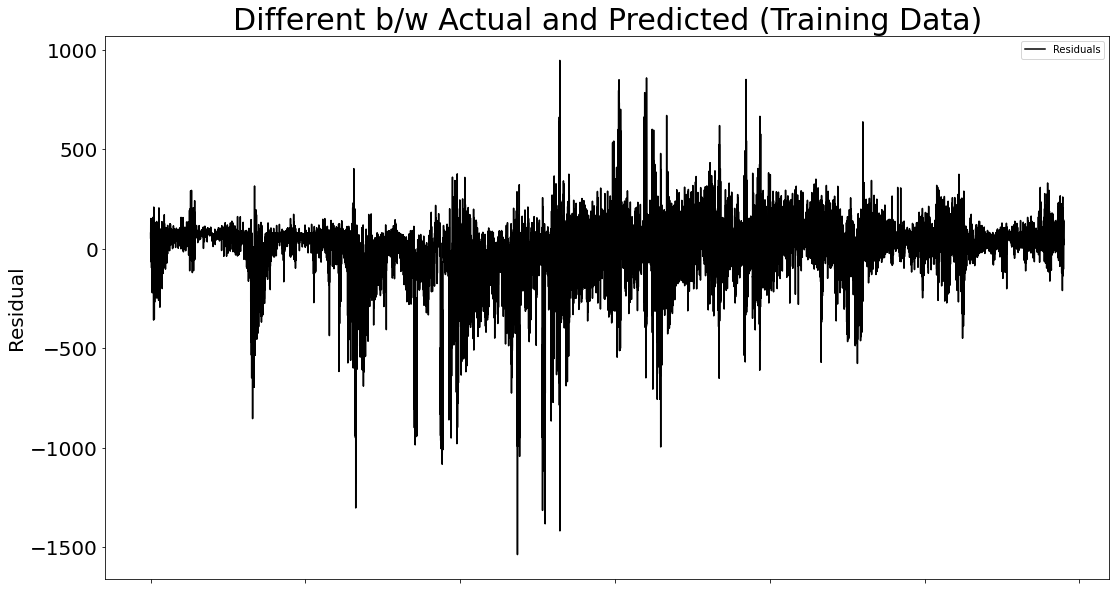

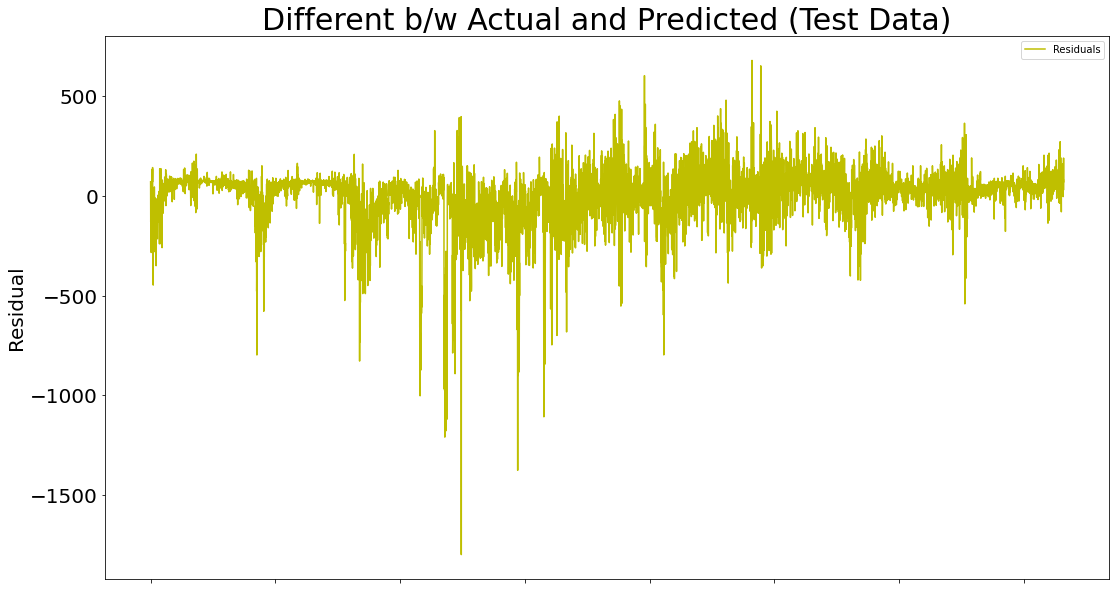

In [53]:
df2 = data[['SUBDIVISION',months[0],months[1],months[2],months[3]]]
#df2 = df['YEAR','JAN','FEB','MAR','APR']
df2.columns = np.array(['SUBDIVISION', 'x1','x2','x3','x4'])

for k in range(1,9):
    df3 = data[['SUBDIVISION',months[k],months[k+1],months[k+2],months[k+3]]]
    df3.columns = np.array(['SUBDIVISION', 'x1','x2','x3','x4'])
    df2 = df2.append(df3)
df2.index = range(df2.shape[0])
    
#df2 = pd.concat([df2, pd.get_dummies(df2['SUBDIVISION'])], axis=1)

df2.drop('SUBDIVISION', axis=1,inplace=True)
#print(df2.info())
msk = np.random.rand(len(df2)) < 0.8

df_train = df2[msk]
df_test = df2[~msk]
df_train.index = range(df_train.shape[0])
df_test.index = range(df_test.shape[0])

reg = linear_model.LinearRegression()
reg.fit(df_train.drop('x4',axis=1),df_train['x4'])
predicted_values = reg.predict(df_train.drop('x4',axis=1))
residuals = predicted_values-df_train['x4'].values
print('MAD (Training Data): ' + str(np.mean(np.abs(residuals))))
df_res = pd.DataFrame(residuals)
df_res.columns = ['Residuals']

fig = plt.figure(figsize=(18,10))
ax = fig.add_subplot(111)
df_res.plot.line(title='Different b/w Actual and Predicted (Training Data)', color = 'k', ax=ax,fontsize=20)
ax.xaxis.set_ticklabels([])
plt.ylabel('Residual')
ax.title.set_fontsize(30)
ax.xaxis.label.set_fontsize(20)
ax.yaxis.label.set_fontsize(20)


predicted_values = reg.predict(df_test.drop('x4',axis=1))
residuals = predicted_values-df_test['x4'].values
print('MAD (Test Data): ' + str(np.mean(np.abs(residuals))))
df_res = pd.DataFrame(residuals)
df_res.columns = ['Residuals']
fig = plt.figure(figsize=(18,10))
ax = fig.add_subplot(111)
df_res.plot.line(title='Different b/w Actual and Predicted (Test Data)', color='y', ax=ax,fontsize=20)
ax.xaxis.set_ticklabels([])
plt.ylabel('Residual')
ax.title.set_fontsize(30)
ax.xaxis.label.set_fontsize(20)
ax.yaxis.label.set_fontsize(20)

MAD (Training Data): 87.84000928365698
MAD (Test Data): 89.24715743846383


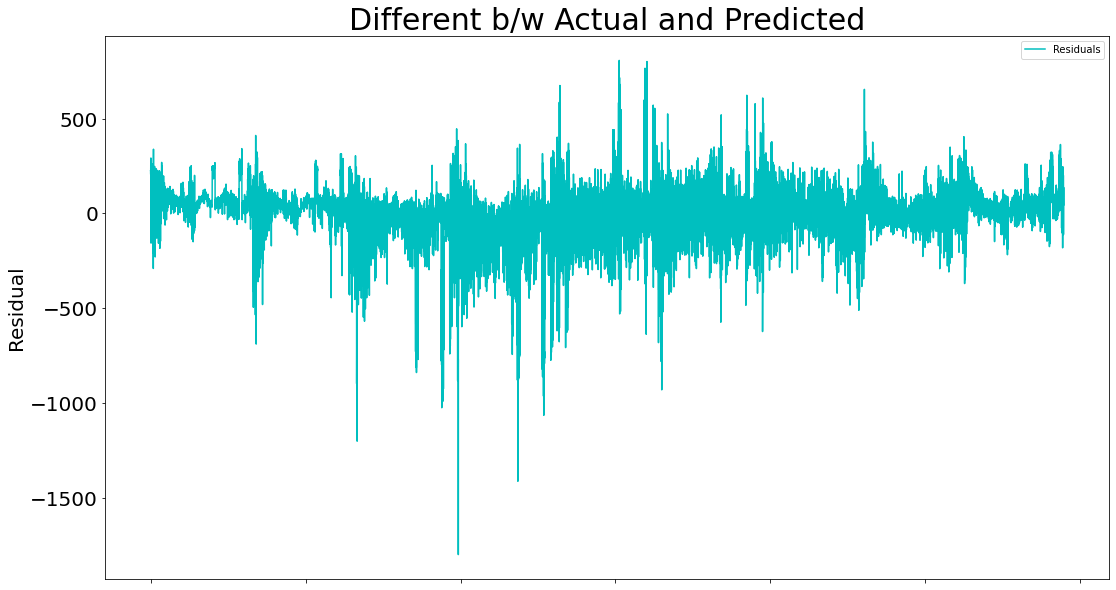

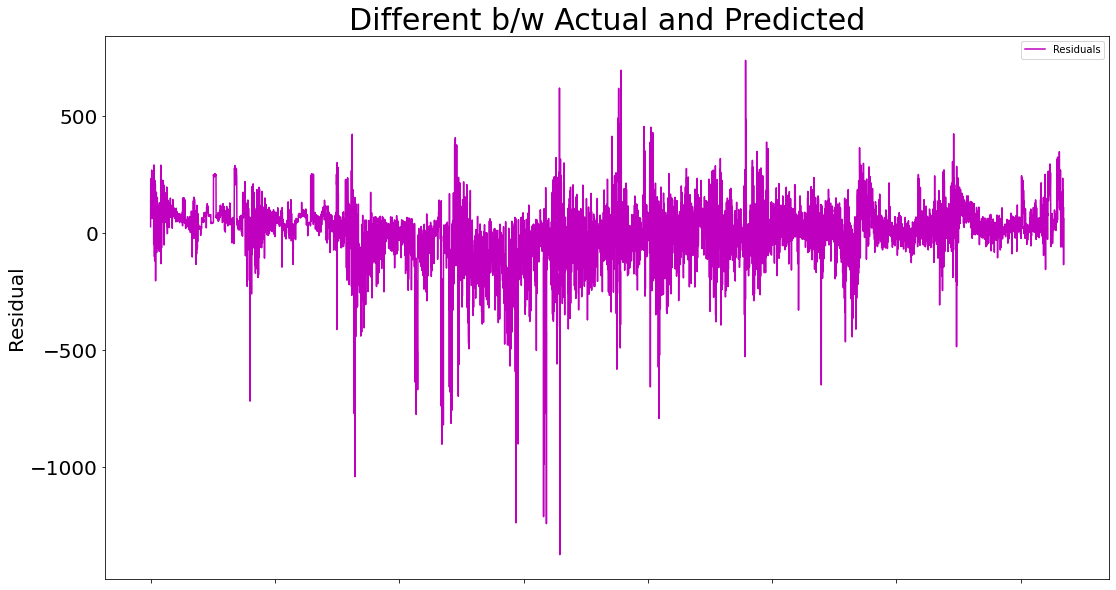

In [54]:
df2 = data[['SUBDIVISION',months[0],months[1],months[2],months[3]]]

df2.columns = np.array(['SUBDIVISION', 'x1','x2','x3','x4'])

for k in range(1,9):
    df3 = data[['SUBDIVISION',months[k],months[k+1],months[k+2],months[k+3]]]
    df3.columns = np.array(['SUBDIVISION', 'x1','x2','x3','x4'])
    df2 = df2.append(df3)
df2.index = range(df2.shape[0])
df2 = pd.concat([df2, pd.get_dummies(df2['SUBDIVISION'])], axis=1)


df2.drop('SUBDIVISION', axis=1,inplace=True)

msk = np.random.rand(len(df2)) < 0.8

df_train = df2[msk]
df_test = df2[~msk]
df_train.index = range(df_train.shape[0])
df_test.index = range(df_test.shape[0])


reg = linear_model.LinearRegression()
reg.fit(df_train.drop('x4',axis=1),df_train['x4'])
#print(reg.coef_)
predicted_values = reg.predict(df_train.drop('x4',axis=1))
residuals = predicted_values-df_train['x4'].values
df_res = pd.DataFrame(residuals)
df_res.columns = ['Residuals']
print('MAD (Training Data): ' + str(np.mean(np.abs(residuals))))

fig = plt.figure(figsize=(18,10))
ax = fig.add_subplot(111)
df_res.plot.line(title='Different b/w Actual and Predicted', color = 'c', ax=ax,fontsize=20)
ax.xaxis.set_ticklabels([])
plt.ylabel('Residual')
ax.title.set_fontsize(30)
ax.xaxis.label.set_fontsize(20)
ax.yaxis.label.set_fontsize(20)



predicted_values = reg.predict(df_test.drop('x4',axis=1))
residuals = predicted_values-df_test['x4'].values
df_res = pd.DataFrame(residuals)
df_res.columns = ['Residuals']
print('MAD (Test Data): ' + str(np.mean(np.abs(residuals))))

fig = plt.figure(figsize=(18,10))
ax = fig.add_subplot(111)
df_res.plot.line(title='Different b/w Actual and Predicted', color='m', ax=ax,fontsize=20)
ax.xaxis.set_ticklabels([])
plt.ylabel('Residual')
ax.title.set_fontsize(30)
ax.xaxis.label.set_fontsize(20)
ax.yaxis.label.set_fontsize(20)

Overall MAD (Training): 86.88207079662646
Overall MAD (Testing): 85.16228884188341


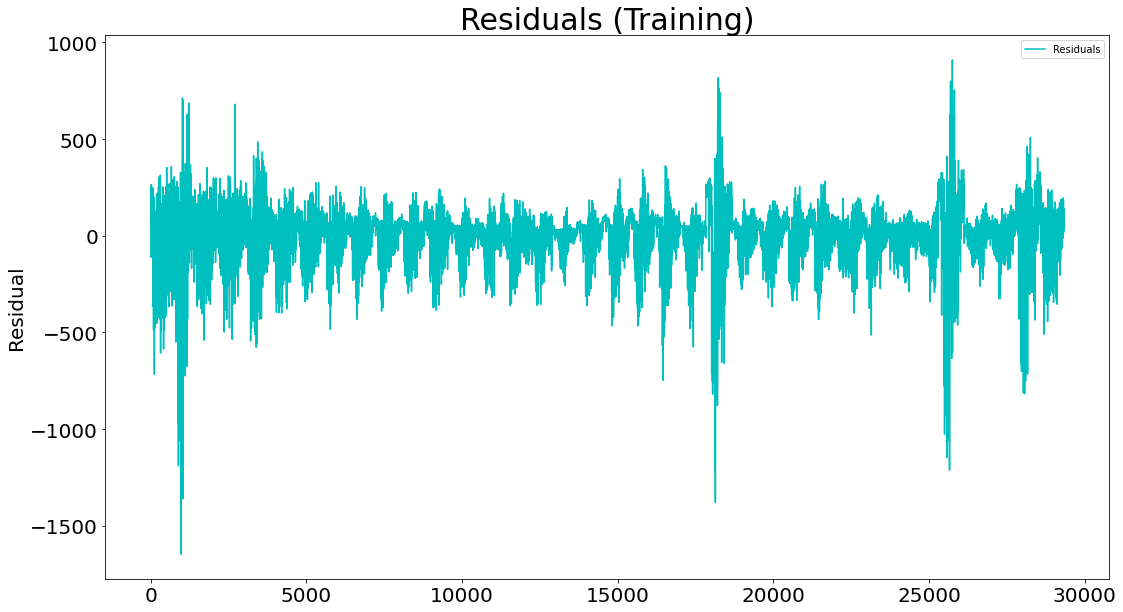

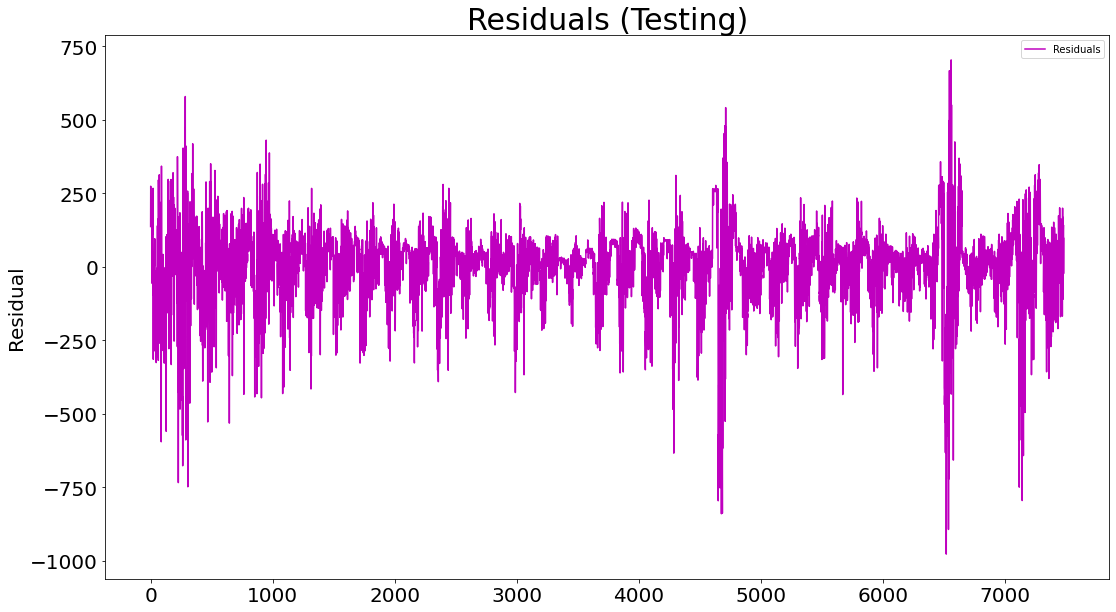

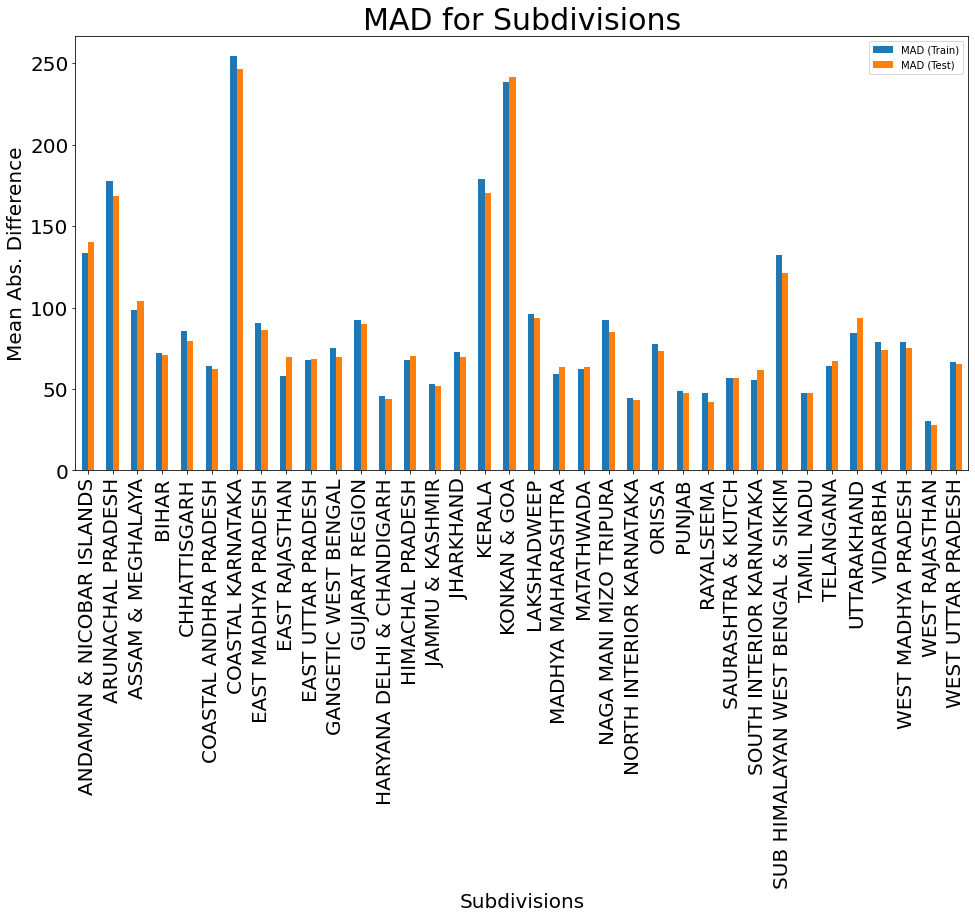

In [55]:
df_res_training = pd.DataFrame(columns=np.array(['Residuals']))
df_res_testing = pd.DataFrame(columns=np.array(['Residuals']))
list_mad_training = []
mean_abs_diff_training = 0
list_mad_testing = []
mean_abs_diff_testing = 0
for subd in subdivs:
    df1 = data[data['SUBDIVISION']==subd]
    df2 = df1[[months[0],months[1],months[2],months[3]]]
    df2.columns = np.array(['x1','x2','x3','x4'])
    for k in range(1,9):
        df3 = df1[[months[k],months[k+1],months[k+2],months[k+3]]]
        df3.columns = np.array(['x1','x2','x3','x4'])
        df2 = df2.append(df3)
    df2.index = range(df2.shape[0])
    msk = np.random.rand(len(df2)) < 0.8
    df_train = df2[msk]
    df_test = df2[~msk]
    df_train.index = range(df_train.shape[0])
    df_test.index = range(df_test.shape[0])
    reg = linear_model.LinearRegression()
    reg.fit(df_train.drop('x4',axis=1),df_train['x4'])
    
    predicted_values = reg.predict(df_train.drop('x4',axis=1))
    residuals = predicted_values-df_train['x4'].values
    df_res_training = df_res_training.append(pd.DataFrame(residuals,columns=np.array(['Residuals'])))
    mean_abs_diff_training = mean_abs_diff_training + np.sum(np.abs(residuals))
    list_mad_training.append(np.mean(np.abs(residuals)))
    
    predicted_values = reg.predict(df_test.drop('x4',axis=1))
    residuals = predicted_values-df_test['x4'].values
    df_res_testing = df_res_testing.append(pd.DataFrame(residuals,columns=np.array(['Residuals'])))
    mean_abs_diff_testing = mean_abs_diff_testing + np.sum(np.abs(residuals))
    list_mad_testing.append(np.mean(np.abs(residuals)))
    
    
df_res_training.index = range(df_res_training.shape[0])
mean_abs_diff_training = mean_abs_diff_training/df_res_training.shape[0]
print('Overall MAD (Training): ' + str(mean_abs_diff_training))
fig = plt.figure(figsize=(18,10))
ax = fig.add_subplot(111)
df_res_training.plot.line(title='Residuals (Training)', color='c',ax=ax,fontsize=20)
#ax.xaxis.set_ticklabels([])
plt.ylabel('Residual')
ax.title.set_fontsize(30)
ax.xaxis.label.set_fontsize(20)
ax.yaxis.label.set_fontsize(20)

df_res_testing.index = range(df_res_testing.shape[0])
mean_abs_diff_testing = mean_abs_diff_testing/df_res_testing.shape[0]
print('Overall MAD (Testing): ' + str(mean_abs_diff_testing))
fig = plt.figure(figsize=(18,10))
ax = fig.add_subplot(111)
df_res_testing.plot.line(title='Residuals (Testing)', color='m',ax=ax,fontsize=20)
#ax.xaxis.set_ticklabels([])
plt.ylabel('Residual')
ax.title.set_fontsize(30)
ax.xaxis.label.set_fontsize(20)
ax.yaxis.label.set_fontsize(20)


pd_mad = pd.DataFrame(data=list_mad_training,columns=["MAD (Train)"])
pd_mad["MAD (Test)"] = list_mad_testing;
pd_mad['Subdivisions'] = subdivs;
fig = plt.figure(figsize=(16,8))
ax = fig.add_subplot(111)
#pd_mad.groupby('Subdivisions').mean().plot(title='Overall Rainfall in Each Month of Year', ax=ax,fontsize=20)
pd_mad.groupby('Subdivisions').mean().plot.bar( width=0.5,title='MAD for Subdivisions', ax= ax, fontsize=20)
plt.xticks(rotation = 90)
plt.ylabel('Mean Abs. Difference')
ax.title.set_fontsize(30)
ax.xaxis.label.set_fontsize(20)
ax.yaxis.label.set_fontsize(20)

array([[<AxesSubplot:title={'center':'YEAR'}>,
        <AxesSubplot:title={'center':'JAN'}>,
        <AxesSubplot:title={'center':'FEB'}>,
        <AxesSubplot:title={'center':'MAR'}>],
       [<AxesSubplot:title={'center':'APR'}>,
        <AxesSubplot:title={'center':'MAY'}>,
        <AxesSubplot:title={'center':'JUN'}>,
        <AxesSubplot:title={'center':'JUL'}>],
       [<AxesSubplot:title={'center':'AUG'}>,
        <AxesSubplot:title={'center':'SEP'}>,
        <AxesSubplot:title={'center':'OCT'}>,
        <AxesSubplot:title={'center':'NOV'}>],
       [<AxesSubplot:title={'center':'DEC'}>,
        <AxesSubplot:title={'center':'ANNUAL'}>,
        <AxesSubplot:title={'center':'Jan-Feb'}>,
        <AxesSubplot:title={'center':'Mar-May'}>],
       [<AxesSubplot:title={'center':'Jun-Sep'}>,
        <AxesSubplot:title={'center':'Oct-Dec'}>, <AxesSubplot:>,
        <AxesSubplot:>]], dtype=object)

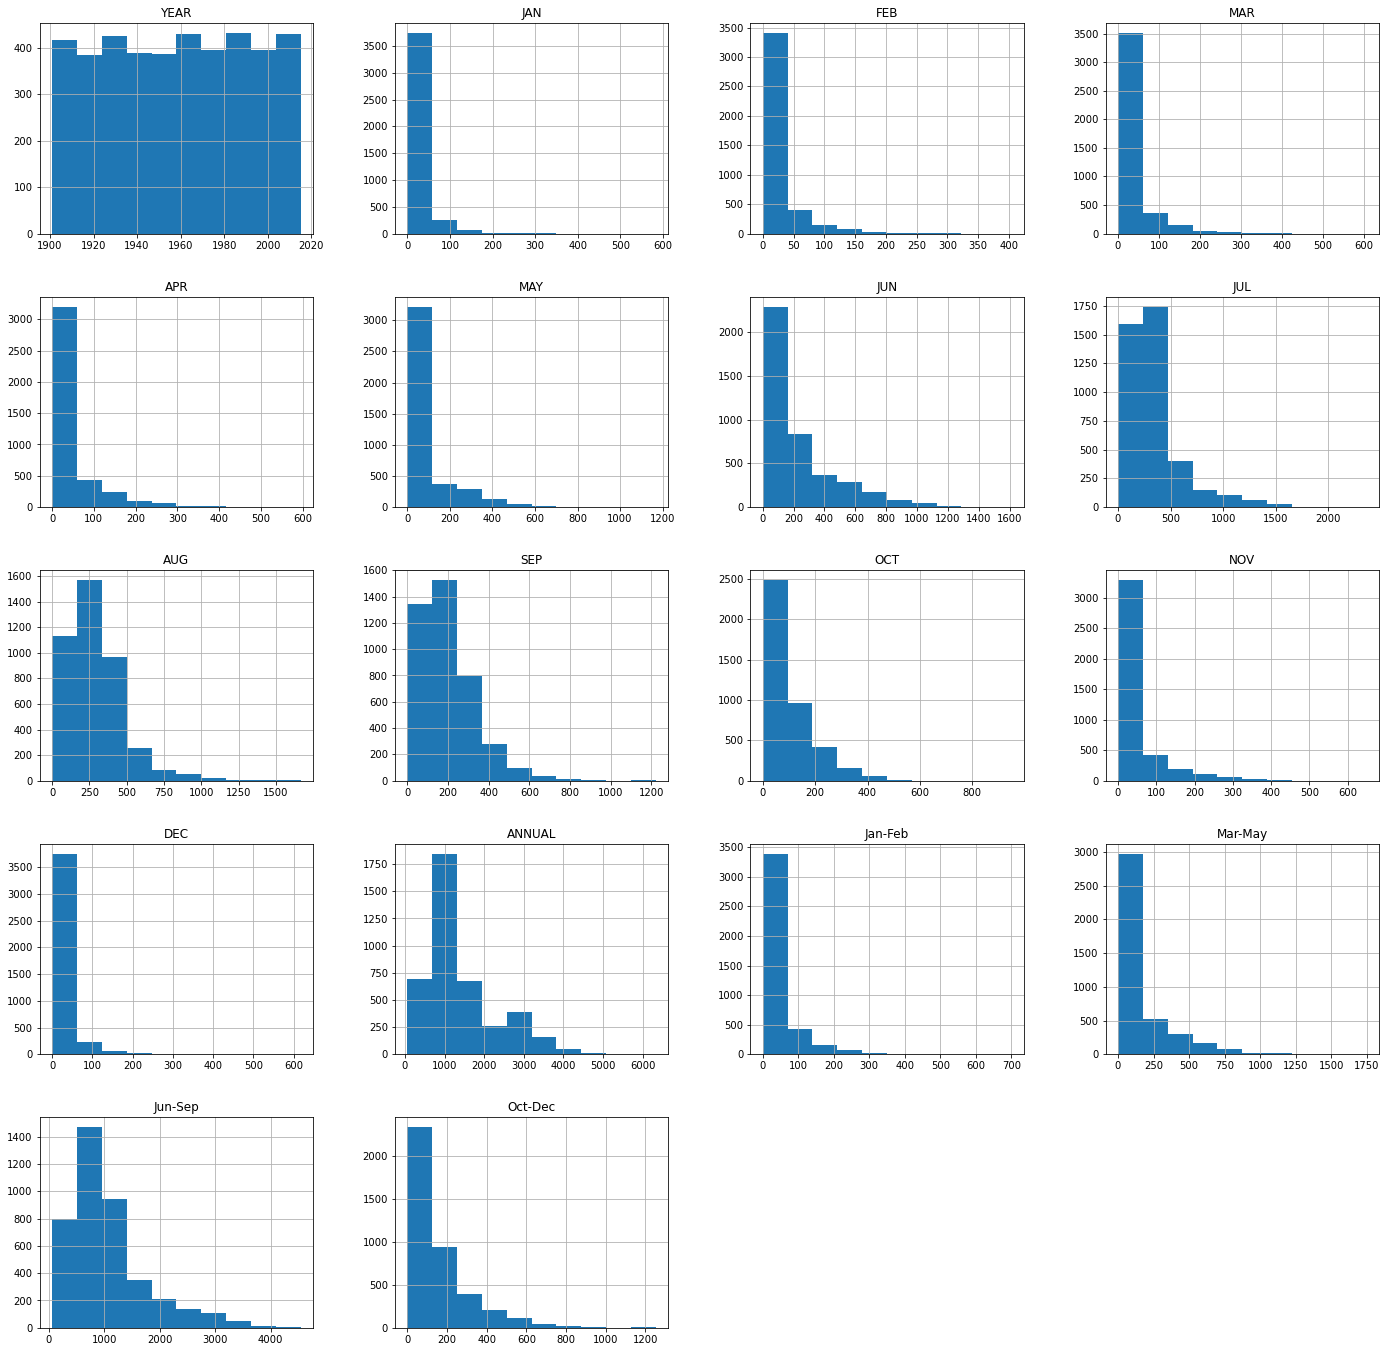

In [56]:
data.hist(figsize=(24,24))

In [58]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error

division_data = np.asarray(data[['JAN', 'FEB', 'MAR', 'APR', 'MAY', 'JUN', 'JUL',
       'AUG', 'SEP', 'OCT', 'NOV', 'DEC']])

X = None; y = None
for i in range(division_data.shape[1]-3):
    if X is None:
        X = division_data[:, i:i+3]
        y = division_data[:, i+3]
    else:
        X = np.concatenate((X, division_data[:, i:i+3]), axis=0)
        y = np.concatenate((y, division_data[:, i+3]), axis=0)
        
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)

In [59]:
#test 2010
temp = data[['SUBDIVISION','JAN', 'FEB', 'MAR', 'APR', 'MAY', 'JUN', 'JUL',
       'AUG', 'SEP', 'OCT', 'NOV', 'DEC']].loc[data['YEAR'] == 2010]

data_2010 = np.asarray(temp[['JAN', 'FEB', 'MAR', 'APR', 'MAY', 'JUN', 'JUL',
       'AUG', 'SEP', 'OCT', 'NOV', 'DEC']].loc[temp['SUBDIVISION'] == 'TELANGANA'])

X_year_2010 = None; y_year_2010 = None
for i in range(data_2010.shape[1]-3):
    if X_year_2010 is None:
        X_year_2010 = data_2010[:, i:i+3]
        y_year_2010 = data_2010[:, i+3]
    else:
        X_year_2010 = np.concatenate((X_year_2010, data_2010[:, i:i+3]), axis=0)
        y_year_2010 = np.concatenate((y_year_2010, data_2010[:, i+3]), axis=0)
#test 2005

In [60]:
#terst 2015
temp = data[['SUBDIVISION','JAN', 'FEB', 'MAR', 'APR', 'MAY', 'JUN', 'JUL',
       'AUG', 'SEP', 'OCT', 'NOV', 'DEC']].loc[data['YEAR'] == 2015]

data_2015 = np.asarray(temp[['JAN', 'FEB', 'MAR', 'APR', 'MAY', 'JUN', 'JUL',
       'AUG', 'SEP', 'OCT', 'NOV', 'DEC']].loc[temp['SUBDIVISION'] == 'TELANGANA'])

X_year_2015 = None; y_year_2015 = None
for i in range(data_2015.shape[1]-3):
    if X_year_2015 is None:
        X_year_2015 = data_2015[:, i:i+3]
        y_year_2015 = data_2015[:, i+3]
    else:
        X_year_2015 = np.concatenate((X_year_2015, data_2015[:, i:i+3]), axis=0)
        y_year_2015 = np.concatenate((y_year_2015, data_2015[:, i+3]), axis=0)

In [61]:
from sklearn import linear_model

# linear model
reg = linear_model.ElasticNet(alpha=0.5)
reg.fit(X_train, y_train)
y_pred = reg.predict(X_test)
print (mean_absolute_error(y_test, y_pred))

95.0542239473868
